In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_context("paper")

In [43]:
FILENAME = "results_insertion_merge/half_sorted_test.csv"

experiment_results = pd.read_csv(FILENAME, index_col="sequence_length")

experiment_number_unique = experiment_results["experiment_number"].unique()
assert len(experiment_number_unique) == 1
experiment_number = experiment_number_unique[0]

experiment_results = experiment_results.drop("experiment_number", axis=1)
experiment_results

,insertion_sort_time,merge_sort_time,tim_sort_time
sequence_length,,,
10,0.000029,0.000134,0.000006
100,0.000390,0.000195,0.000004
1000,0.004671,0.000247,0.000003
10000,0.048463,0.000305,0.000005


In [44]:
experiment_results = experiment_results.stack().reset_index()
experiment_results.columns, experiment_results

(Index(['sequence_length', 'level_1', 0], dtype='object'),
     sequence_length              level_1         0
 0                10  insertion_sort_time  0.000029
 1                10      merge_sort_time  0.000134
 2                10        tim_sort_time  0.000006
 3               100  insertion_sort_time  0.000390
 4               100      merge_sort_time  0.000195
 5               100        tim_sort_time  0.000004
 6              1000  insertion_sort_time  0.004671
 7              1000      merge_sort_time  0.000247
 8              1000        tim_sort_time  0.000003
 9             10000  insertion_sort_time  0.048463
 10            10000      merge_sort_time  0.000305
 11            10000        tim_sort_time  0.000005)

In [45]:
experiment_results = experiment_results.rename({"level_1": "algorithm_type", 0: "seconds"}, axis=1)
experiment_results

,sequence_length,algorithm_type,seconds
0,10,insertion_sort_time,0.000029
1,10,merge_sort_time,0.000134
2,10,tim_sort_time,0.000006
3,100,insertion_sort_time,0.000390
4,100,merge_sort_time,0.000195
5,100,tim_sort_time,0.000004
6,1000,insertion_sort_time,0.004671
7,1000,merge_sort_time,0.000247
8,1000,tim_sort_time,0.000003
9,10000,insertion_sort_time,0.048463


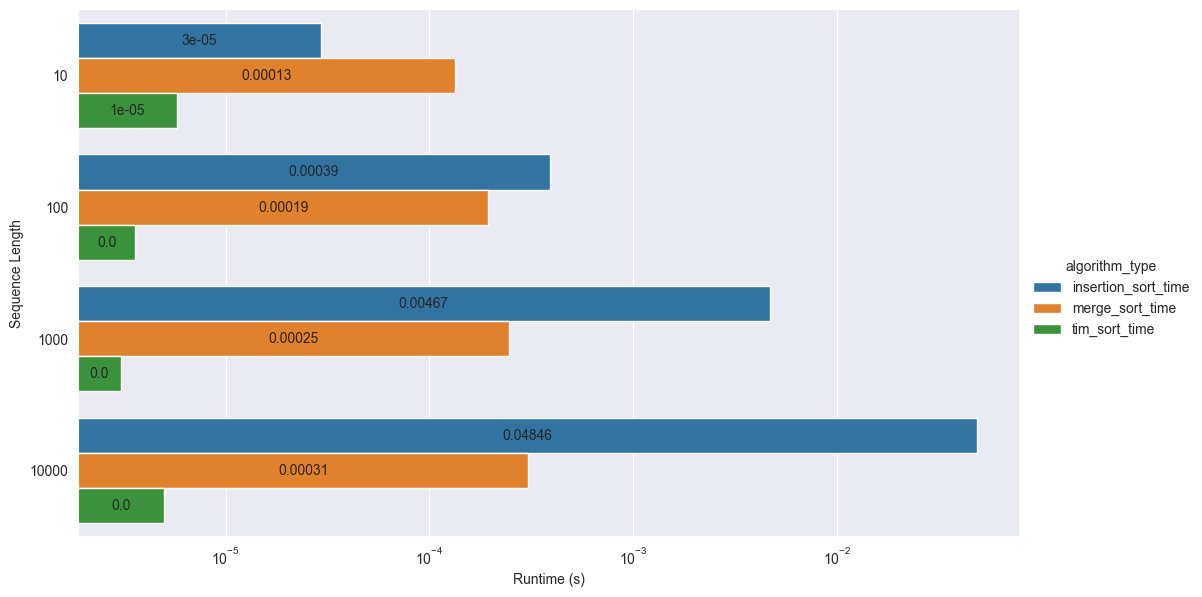

In [46]:
g = sns.catplot(data=experiment_results,
                kind="bar",
                y="sequence_length",
                x="seconds",
                hue="algorithm_type",
                orient="h",
                height=6,
                aspect=1.75,
            )
plt.xscale("log")
plt.ylabel("Sequence Length")
plt.xlabel("Runtime (s)")

ax = g.facet_axis(0, 0)

seconds = experiment_results["seconds"].to_list()

seconds_grouped = []
for algorithm_type in experiment_results["algorithm_type"].unique():
    algorithm_type_filtered = experiment_results[experiment_results["algorithm_type"] == algorithm_type]
    seconds_filtered = algorithm_type_filtered["seconds"]

    seconds_grouped.append(seconds_filtered.to_list())

for seconds_for_type, c in zip(seconds_grouped, ax.containers):
    labels = [round(v, 5) for v in seconds_for_type]
    ax.bar_label(c, labels=labels, label_type='center')